In [20]:
import numpy as np
import pandas as pd
import re
import warnings #Used in order to ignore the warnings messages showed through the notebook
warnings.filterwarnings('ignore') #Setting to ignore the warnings

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/output/submission.csv


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [22]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [23]:
print(df_train.info(),"\n")
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   P

In [24]:
df_test["Survived"] = pd.read_csv("../input/titanic/gender_submission.csv")["Survived"]

In [25]:
# looking missing values

In [26]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [28]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
df_train = df_train.drop(["Ticket","Name","Cabin"],axis=1)

In [30]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [31]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [32]:
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean()) 

In [33]:
df_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
df_train.dropna(axis=0)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [35]:
df_train=df_train.dropna(axis=0)

In [36]:
df_train.isna().sum()
# Train data is cleaned 

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [37]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [38]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [39]:
df_test=df_test.drop(["Name","Ticket","Cabin"],axis=1)

In [40]:
df_test.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Survived        0
dtype: int64

In [41]:
df_test["Age"] = df_test["Age"].fillna(df_test["Age"].mean())
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].mean()) 

In [42]:
df_test.isna().sum()
# Cleaned test dataset 

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [43]:
df_train["Sex"]=df_train["Sex"].astype("category")
df_train["Embarked"] = df_train["Embarked"].astype("category")

In [44]:
# Visualisation Part 

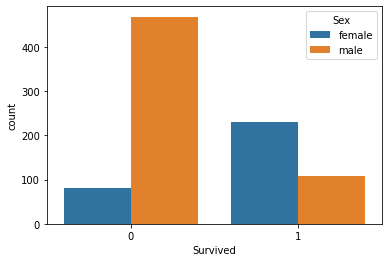

In [45]:
sns.countplot(x="Survived",hue="Sex",data=df_train);

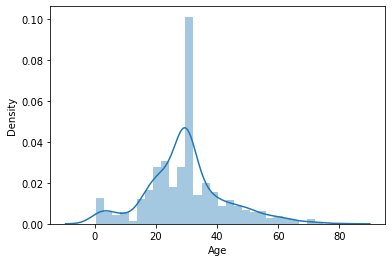

In [46]:
sns.distplot(df_train["Age"]);

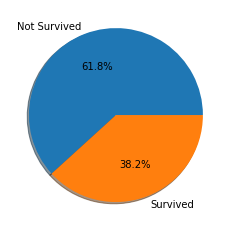

In [47]:
plt.pie(df_train["Survived"].value_counts(),labels=["Not Survived","Survived"],shadow=True,autopct="%.1f%%");


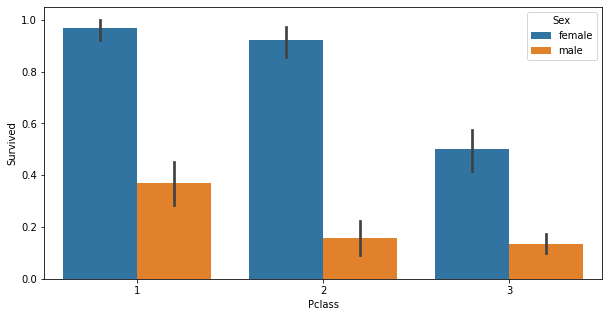

In [48]:
plt.figure(figsize=(10,5))
sns.barplot(x="Pclass",y="Survived",hue="Sex",data=df_train,estimator=np.mean);

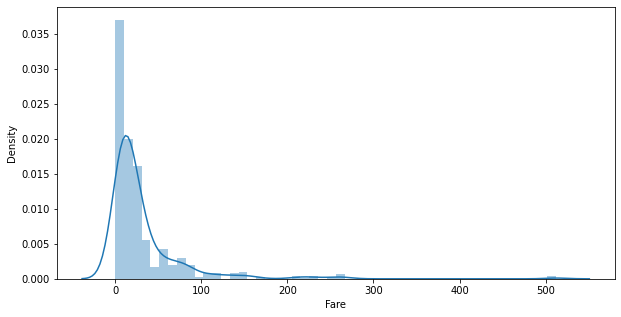

In [49]:
plt.figure(figsize=(10,5))
sns.distplot(df_train["Fare"]);

In [50]:
df_train.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex            category
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked       category
dtype: object

In [51]:
# Time to create dummy variables
sex = pd.get_dummies(df_train["Sex"],prefix="Sex",drop_first=True)
df_train = pd.concat([df_train,sex],axis=1)

pclass = pd.get_dummies(df_train["Pclass"],prefix="Pclass",drop_first=True)
df_train = pd.concat([df_train,pclass],axis=1)

embarked = pd.get_dummies(df_train["Embarked"],prefix="Embarked",drop_first=True)
df_train = pd.concat([df_train,embarked],axis=1)

df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,0,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,1,0,1,0,1


In [52]:
df_train = df_train.drop(["Embarked","Pclass","Sex"],axis=1)
df_train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,0,1
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


In [53]:
df_train.dtypes

PassengerId      int64
Survived         int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Sex_male         uint8
Pclass_2         uint8
Pclass_3         uint8
Embarked_Q       uint8
Embarked_S       uint8
dtype: object

In [54]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Survived         int64
dtype: object

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score,roc_curve,mean_squared_error,confusion_matrix,classification_report,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,scale
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [56]:
models = [LogisticRegression,
         KNeighborsClassifier,
         SVC,
         MLPClassifier,
         DecisionTreeClassifier,
         RandomForestClassifier,
         GradientBoostingClassifier,
         XGBClassifier,
         LGBMClassifier,]


In [57]:
def compML(df_train,models):
    result=[]
    results=pd.DataFrame(columns=["Models","Score"])
    y=df_train["Survived"]
    X=df_train.drop(columns=["Survived"],axis=1)
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.6,random_state=42)
    
    # For Normal Results
    for alg in models:
        model=alg().fit(X_train,y_train)
        predicted=model.predict(X_test)
        score=accuracy_score(y_test,predicted)
        name=alg.__name__
        result=pd.DataFrame([[name,score*100]],columns=["Models","Score"])
        results=results.append(result)
        print(name,"Accuracy Score is {:.1f}%".format(score*100))
    return results

In [58]:
results=compML(df_train,models)
results.sort_values(by="Score",inplace=True,ascending=True)

LogisticRegression Accuracy Score is 79.8%
KNeighborsClassifier Accuracy Score is 59.6%
SVC Accuracy Score is 61.2%
MLPClassifier Accuracy Score is 72.8%
DecisionTreeClassifier Accuracy Score is 75.0%
RandomForestClassifier Accuracy Score is 80.3%
GradientBoostingClassifier Accuracy Score is 81.7%
XGBClassifier Accuracy Score is 78.1%
LGBMClassifier Accuracy Score is 80.9%


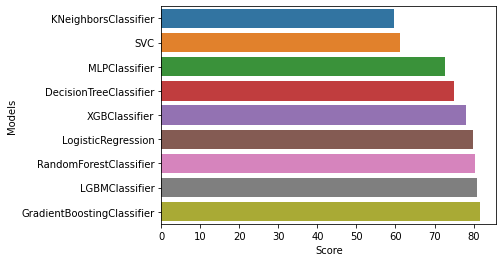

In [59]:
sns.barplot(x="Score",y="Models",data=results); # Results of nontuned models or defaults parameters

In [60]:
def gridcv_comp(df_train,models):
    result=[]
    params={}
    results=pd.DataFrame(columns=["Models","Score"])
    y=df_train["Survived"]
    X=df_train.drop(columns=["Survived"],axis=1)
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.6,random_state=42)
    
    # For CV Results
    for alg in models:
        
        if (alg.__name__=="LogisticRegression"):
            model=alg()
            params={"solver":["liblinear"]}
            cv=GridSearchCV(model,param_grid=params,cv=3,n_jobs=-1).fit(X_train,y_train)
            best_param=cv.best_params_
            
            model=alg(solver=best_param["solver"]).fit(X_train,y_train)
            predicted=model.predict(X_test)
            score=accuracy_score(y_test,predicted)
            
            name=alg.__name__
            result=pd.DataFrame([[name,score*100]],columns=["Models","Score"])
            results=results.append(result)
            print(name,"Accuracy Score is {:.1f}%".format(score*100))
            
        elif (alg.__name__=="KNeighborsClassifier"):
            model=alg()
            params={"n_neighbors":[5,10,15]}
            cv=GridSearchCV(model,param_grid=params,cv=3,n_jobs=-1).fit(X_train,y_train)
            best_param=cv.best_params_
    
            model=alg(n_neighbors=best_param["n_neighbors"]).fit(X_train,y_train)
            predicted=model.predict(X_test)
            score=accuracy_score(y_test,predicted)
            
            name=alg.__name__
            result=pd.DataFrame([[name,score*100]],columns=["Models","Score"])
            results=results.append(result)
            print(name,"Accuracy Score is {:.1f}%".format(score*100))
        
        elif (alg.__name__=="SVC"):
            model=alg()
            params={"kernel":["linear","rbf"],
                    "C":np.arange(1,10)}
            cv=GridSearchCV(model,param_grid=params,cv=3,n_jobs=-1).fit(X_train,y_train)
            
    
            model=alg(kernel=cv.best_params_["kernel"],C=cv.best_params_["C"]).fit(X_train,y_train)
            predicted=model.predict(X_test)
            score=accuracy_score(y_test,predicted)
            
            name=alg.__name__
            result=pd.DataFrame([[name,score*100]],columns=["Models","Score"])
            results=results.append(result)
            print(name,"Accuracy Score is {:.1f}%".format(score*100))
            
        elif (alg.__name__=="MLPClassifier"):
            scaler=StandardScaler()
            scaler.fit(X_train)
            X_train=scaler.transform(X_train)
            scaler.fit(X_test)
            X_test = scaler.transform(X_test)
            model=alg()
            
            params={"hidden_layer_sizes":[(10,10),(100,100),(5,5)],
                    "activation":["logistic"],
                    "solver":["lbfgs"],
                    "alpha":[0.1,0.01,1.5,0.03]}
            cv=GridSearchCV(model,param_grid=params,cv=3,n_jobs=-1).fit(X_train,y_train)
            best_param=cv.best_params_
    
            model=alg(hidden_layer_sizes=cv.best_params_["hidden_layer_sizes"],
                      activation=cv.best_params_["activation"],
                      solver=cv.best_params_["solver"],
                      alpha=cv.best_params_["alpha"]).fit(X_train,y_train)
        
            predicted=model.predict(X_test)
            score=accuracy_score(y_test,predicted)
            name=alg.__name__
            result=pd.DataFrame([[name,score*100]],columns=["Models","Score"])
            results=results.append(result)
            print(name,"Accuracy Score is {:.1f}%".format(score*100))
        
        elif (alg.__name__=="DecisionTreeClassifier"):
            model=alg()
            params={"max_depth":[2,5,8],
                    "min_samples_split":[2,3,5]}
            cv=GridSearchCV(model,param_grid=params,cv=3,n_jobs=-1).fit(X_train,y_train)
            best_param=cv.best_params_
    
            model=alg(max_depth=cv.best_params_["max_depth"],
                      min_samples_split=cv.best_params_["min_samples_split"]).fit(X_train,y_train)
            predicted=model.predict(X_test)
            score=accuracy_score(y_test,predicted)
            
            name=alg.__name__
            result=pd.DataFrame([[name,score*100]],columns=["Models","Score"])
            results=results.append(result)
            print(name,"Accuracy Score is {:.1f}%".format(score*100))
            
        elif (alg.__name__=="RandomForestClassifier"):
            model=alg()
            params={"n_estimators":[100,300,200],
                    "max_features":[3,5,7]
                    ,"min_samples_split":[2,5,8]}
            cv=GridSearchCV(model,param_grid=params,cv=3,n_jobs=-1).fit(X_train,y_train)
            best_param=cv.best_params_
    
            model=alg(n_estimators=cv.best_params_["n_estimators"],
                      min_samples_split=cv.best_params_["min_samples_split"],
                      max_features=cv.best_params_["max_features"]).fit(X_train,y_train)
            predicted=model.predict(X_test)
            score=accuracy_score(y_test,predicted)
            
            name=alg.__name__
            result=pd.DataFrame([[name,score*100]],columns=["Models","Score"])
            results=results.append(result)
            print(name,"Accuracy Score is {:.1f}%".format(score*100))
        
        elif (alg.__name__=="GradientBoostingClassifier"):
            model=alg()
            params={"n_estimators":[100,300,200],
                    "max_depth":[3,5,7],
                    "learning_rate":[0.1,0.01,0.05]}
            cv=GridSearchCV(model,param_grid=params,cv=3,n_jobs=-1).fit(X_train,y_train)
            
    
            model=alg(n_estimators=cv.best_params_["n_estimators"],
                      max_depth=cv.best_params_["max_depth"],
                      learning_rate=cv.best_params_["learning_rate"]).fit(X_train,y_train)
            predicted=model.predict(X_test)
            score=accuracy_score(y_test,predicted)
            
            name=alg.__name__
            result=pd.DataFrame([[name,score*100]],columns=["Models","Score"])
            results=results.append(result)
            print(name,"Accuracy Score is {:.1f}%".format(score*100))
            
        elif (alg.__name__=="XGBClassifier"):
            model=alg()
            params={"n_estimators":[100,300,200],
                    "max_depth":[3,5,7],
                    "learning_rate":[0.1,0.01,0.05],
                    "subsample":[0.6,1]}
            cv=GridSearchCV(model,param_grid=params,cv=3,n_jobs=-1).fit(X_train,y_train)
            
    
            model=alg(n_estimators=cv.best_params_["n_estimators"],
                      max_depth=cv.best_params_["max_depth"],
                      learning_rate=cv.best_params_["learning_rate"],
                      subsample=cv.best_params_["subsample"]).fit(X_train,y_train)
            predicted=model.predict(X_test)
            score=accuracy_score(y_test,predicted)
            
            name=alg.__name__
            result=pd.DataFrame([[name,score*100]],columns=["Models","Score"])
            results=results.append(result)
            print(name,"Accuracy Score is {:.1f}%".format(score*100))
            
        elif (alg.__name__=="LGBMClassifier"):
            model=alg()
            params={"n_estimators":[100,300,200],
                    "max_depth":[3,5,7],
                    "learning_rate":[0.1,0.01,0.05]}
            cv=GridSearchCV(model,param_grid=params,cv=3,n_jobs=-1).fit(X_train,y_train)
            
    
            model=alg(n_estimators=cv.best_params_["n_estimators"],
                      max_depth=cv.best_params_["max_depth"],
                      learning_rate=cv.best_params_["learning_rate"]).fit(X_train,y_train)
            predicted=model.predict(X_test)
            score=accuracy_score(y_test,predicted)
            
            name=alg.__name__
            result=pd.DataFrame([[name,score*100]],columns=["Models","Score"])
            results=results.append(result)
            print(name,"Accuracy Score is {:.1f}%".format(score*100))
   
    return results

In [61]:
results=gridcv_comp(df_train,models)


LogisticRegression Accuracy Score is 80.6%
KNeighborsClassifier Accuracy Score is 64.6%
SVC Accuracy Score is 79.5%
MLPClassifier Accuracy Score is 80.9%
DecisionTreeClassifier Accuracy Score is 77.8%
RandomForestClassifier Accuracy Score is 80.6%
GradientBoostingClassifier Accuracy Score is 81.2%
XGBClassifier Accuracy Score is 82.0%
LGBMClassifier Accuracy Score is 81.2%


In [62]:
results.sort_values(by="Score",inplace=True,ascending=True)

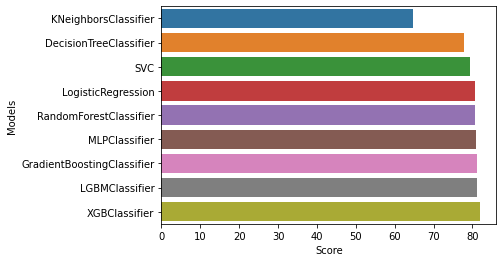

In [63]:
sns.barplot(x="Score",y="Models",data=results);

In [64]:
# As we can see, the best result is given by XGBClassifier

In [65]:
y=df_train["Survived"]
X=df_train.drop(columns=["Survived"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.6,random_state=42)
model = XGBClassifier()
params={"n_estimators":[100,300,200],
                    "max_depth":[3,5,7],
                    "learning_rate":[0.1,0.01,0.05],
                    "subsample":[0.6,1]}
cv=GridSearchCV(model,param_grid=params,cv=3,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


In [66]:
print(cv.best_params_)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.6}


In [67]:
# final model

final_model = XGBClassifier(n_estimators=300,max_depth=3,learning_rate=0.01,subsample=0.6).fit(X_train,y_train)
predicted=final_model.predict(X_test)
print("The Model Score Is: %.2f%%"%(accuracy_score(y_test,predicted)*100))

predictions = pd.DataFrame()

The Model Score Is: 81.74%


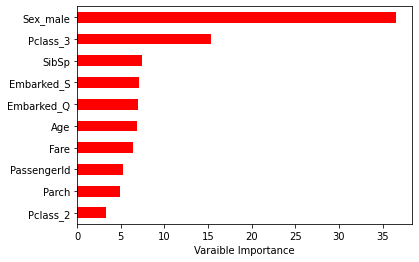

In [68]:
importance = pd.DataFrame({"importance":final_model.feature_importances_*100},index=X_train.columns)

importance.sort_values(by="importance",ascending=True).plot(kind="barh",color="r")

plt.xlabel("Varaible Importance")
plt.gca().legend_=None

In [69]:
predicted = pd.DataFrame({"Survived":predicted},index=y_test.index)
predicted

,Survived
281,0
435,1
39,1
418,0
585,1
...,...
177,1
599,1
441,0
164,0


In [70]:
predicted.to_csv("submission.csv",index=True)

In [73]:
submission =  pd.read_csv("../input/titanic/gender_submission.csv")

In [74]:
submission.shape

(418, 2)

In [75]:
y_test.index

Int64Index([281, 435,  39, 418, 585, 804, 343, 836, 581, 537,
            ...
            627, 391, 636, 523, 545, 177, 599, 441, 164, 249],
           dtype='int64', length=356)

In [76]:
predicted["PassengerId"] = list(y_test.index)

In [77]:
cols = predicted.columns.tolist()

In [78]:
cols = cols[-1:] + cols[:-1]

In [79]:
predicted = predicted[cols]

In [80]:
predicted.reset_index(drop=True)

,PassengerId,Survived
0,281,0
1,435,1
2,39,1
3,418,0
4,585,1
...,...,...
351,177,1
352,599,1
353,441,0
354,164,0


In [81]:
predicted.to_csv("submission.csv",index=False)